## Subclassing API の使い方
また TensorFlow2.0 の Keras には Sequential モデルと Subclassing API があります。Seqential API は入力層と出力層が一つの流れで繋がっている（線形スタック）モデルのみ構築できます。それに対して、Subclassing API は線形スタックモデルだけでなく、複数の入力層や出力層があるモデルを構築することも可能です。今回はこの Subclassing API の使い方を紹介します。

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Pythonの挙動を整えるライブラリのインポート
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow と tf.keras のインポート
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)

2.1.0


In [3]:
from tensorflow.keras.datasets import mnist

In [4]:
train, test = mnist.load_data()

In [5]:
train_x = train[0].reshape(60000, 28, 28, 1) / 255 # 正規化
test_x = test[0].reshape(10000, 28, 28, 1) / 255 # 正規化

train_t = train[1]
test_t = test[1]

In [6]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten

In [7]:
import os
import random

def reset_seed(seed=0):
    
    os.environ['PYTHONHASHSEED'] = '0'
    random.seed(seed) #　random関数のシードを固定
    np.random.seed(seed) #numpyのシードを固定
    tf.random.set_seed(seed) #tensorflowのシードを固定

In [8]:
# シードの固定
reset_seed(0)

class MyModel(Model):
  def __init__(self):
    super(MyModel, self).__init__()
    self.conv1 = Conv2D(32, 3, activation='relu')
    self.flatten = Flatten()
    self.d1 = Dense(128, activation='relu')
    self.d2 = Dense(10, activation='softmax')

  def call(self, x):
    x = self.conv1(x)
    x = self.flatten(x)
    x = self.d1(x)
    return self.d2(x)


In [9]:
#インスタンス化
model = MyModel()

In [10]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

batch_size = 4096
epochs = 30

history = model.fit(train_x, train_t, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(test_x, test_t))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 7s 114us/sample - loss: 0.8725 - accuracy: 0.7656 - val_loss: 0.3349 - val_accuracy: 0.9032
Epoch 2/30
60000/60000 [==============================] - 7s 110us/sample - loss: 0.2949 - accuracy: 0.9160 - val_loss: 0.2363 - val_accuracy: 0.9339
Epoch 3/30
60000/60000 [==============================] - 7s 110us/sample - loss: 0.2115 - accuracy: 0.9395 - val_loss: 0.1797 - val_accuracy: 0.9481
Epoch 4/30
60000/60000 [==============================] - 7s 111us/sample - loss: 0.1624 - accuracy: 0.9536 - val_loss: 0.1455 - val_accuracy: 0.9582
Epoch 5/30
60000/60000 [==============================] - 7s 109us/sample - loss: 0.1271 - accuracy: 0.9650 - val_loss: 0.1173 - val_accuracy: 0.9669
Epoch 6/30
60000/60000 [==============================] - 7s 109us/sample - loss: 0.1024 - accuracy: 0.9720 - val_loss: 0.0989 - val_accuracy: 0.9716
Epoch 7/30
60000/60000 [==========================

In [11]:
# 学習結果がモデルの中に辞書型で保存されており、それをPandasのDataFrame型で読み込みます。
results = pd.DataFrame(history.history)

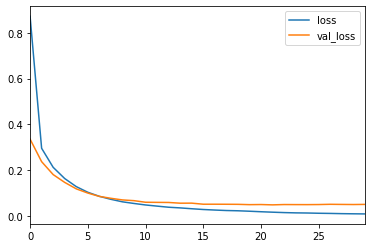

In [12]:
# loss（損失関数）を表示
results[['loss', 'val_loss']].plot()

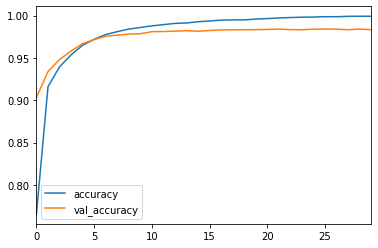

In [13]:
# accuracy（精度）を表示
results[['accuracy', 'val_accuracy']].plot()

こちらのようにうまく学習できていること様子が確認できます。
オーバーフィッティングすることもなく、学習できています。